# Distribuição com redes neurais
## Inicialização de pesos em redes neurais

In [1]:
import tensorflow as tf
tf.__version__

'2.3.1'

### Inicializadores

- https://keras.io/api/layers/initializers/

In [2]:
from tensorflow.keras import initializers

### Random normal

In [3]:
normal = initializers.RandomNormal()
data_normal = normal(shape=[1000])

In [4]:
import numpy as np
np.mean(data_normal), np.std(data_normal)

(-0.0004607327, 0.046949763)

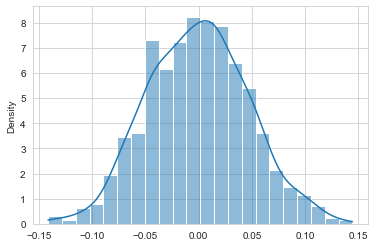

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

sns.histplot(data_normal, kde=True, stat='density');

### Random uniforme

In [6]:
uniform = initializers.RandomUniform()
data_uniform = uniform(shape=[1000])

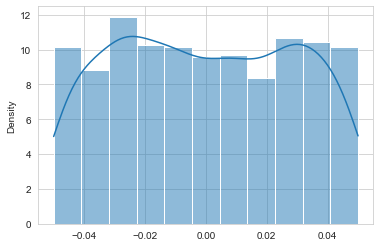

In [7]:
sns.histplot(data_uniform, kde=True, stat='density');

#### Glorot normal (Xavier initialization)

- Centered on 0 with stddev = sqrt(2 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor
- https://keras.io/api/layers/initializers/

In [8]:
# in -> neuronios ->  neuronios -> neuronios (out)
# 10 ->    100    ->    100     ->     1
print(f'{(2 / (10 + 100)) ** 0.5} = std pesos: in(10) -> layer1(100)')
print(f'{(2 / (100 + 100)) ** 0.5} = std pesos: layer1(100) -> layer2(100)')
print(f'{(2 / (1 + 100)) ** 0.5} = std pesos: layer2(100) -> layer3(1)')

0.13483997249264842 = std pesos: in(10) -> layer1(100)
0.1 = std pesos: layer1(100) -> layer2(100)
0.14071950894605836 = std pesos: layer2(100) -> layer3(1)


In [9]:
glorot_norm = initializers.GlorotNormal()
data_glorot_norm = glorot_norm(shape=[1000])

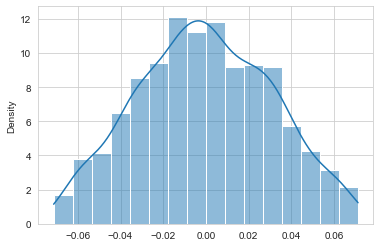

In [10]:
sns.histplot(data_glorot_norm, kde=True, stat='density');

### Glorot uniform

In [11]:
glorot_uniform = initializers.GlorotUniform()
data_glorot_uniform = glorot_uniform(shape=[1000])

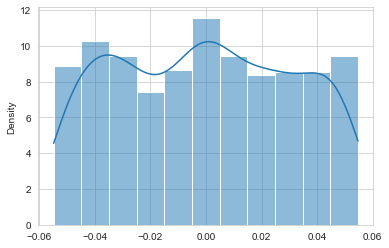

In [12]:
sns.histplot(data_glorot_uniform, kde=True, stat='density');

## Testes de normalidade
- Estatística paramétrica: os dados estão em alguma distribuição, geralmente a distribuição normal
- Estatística não paramétrica: os dados estão em outra distribuição (ou desconhecida)
- Se os dados são "normais", usamos estatística paramétrica. Caso  contrário, usamos estatística não paramérica

In [13]:
from scipy import stats
from scipy.stats import skewnorm

In [14]:
data_norm = stats.norm.rvs(size = 1000)
data_not_norm = skewnorm.rvs(a = -10, size = 1000)

### Histograma

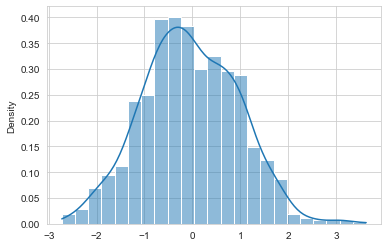

In [15]:
sns.histplot(data_norm, stat='density', kde=True);

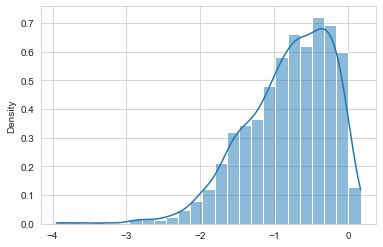

In [16]:
sns.histplot(data_not_norm, stat='density', kde=True);

### Quantile-quantile plot

In [17]:
from statsmodels.graphics.gofplots import qqplot

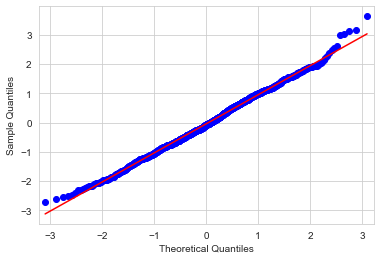

In [18]:
qqplot(data_norm, line ='s');

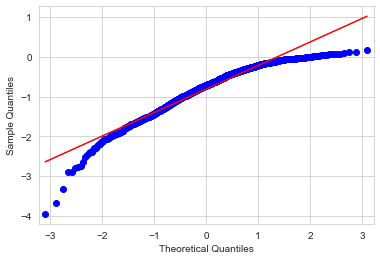

In [19]:
qqplot(data_not_norm, line ='s');

### Teste de Shapiro-Wilk

- p-value é usado para interpretar o teste estatístico
- p <= alpha: rejeita a hipótese, não é normal
- p > alpha: não rejeita a hipótese, é normal

In [20]:
from scipy.stats import shapiro

In [21]:
def chk_distrib(p):
    alpha = 0.05
    if p > alpha:
        print('Distribuição normal')
    else:
        print('Distribuição não normal')

In [22]:
_, p = shapiro(data_norm)
p

0.05204674229025841

In [23]:
chk_distrib(p)

Distribuição normal


In [24]:
_, p = shapiro(data_not_norm)
p

3.870493374433491e-19

In [25]:
chk_distrib(p)

Distribuição não normal
